<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Load-MNIST-Dataset" data-toc-modified-id="Load-MNIST-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load MNIST Dataset</a></span></li><li><span><a href="#Split-Dataset" data-toc-modified-id="Split-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Dataset</a></span></li><li><span><a href="#LeNet-Network" data-toc-modified-id="LeNet-Network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LeNet Network</a></span></li><li><span><a href="#Initializer" data-toc-modified-id="Initializer-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Initializer</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Analysis</a></span></li></ul></li><li><span><a href="#Activation-Function" data-toc-modified-id="Activation-Function-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Activation Function</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Analysis</a></span></li></ul></li><li><span><a href="#Optimizer" data-toc-modified-id="Optimizer-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Optimizer</a></span><ul class="toc-item"><li><span><a href="#Analysis" data-toc-modified-id="Analysis-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Analysis</a></span></li><li><span><a href="#Hyperparameter-Tuning:-Optimizers" data-toc-modified-id="Hyperparameter-Tuning:-Optimizers-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Hyperparameter Tuning: Optimizers</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Full-Train" data-toc-modified-id="Full-Train-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Full Train</a></span><ul class="toc-item"><li><span><a href="#X_test" data-toc-modified-id="X_test-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>X_test</a></span></li></ul></li><li><span><a href="#Loss-Curve-Analysis" data-toc-modified-id="Loss-Curve-Analysis-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Loss Curve Analysis</a></span></li></ul></div>

# Introduction

**Name:** Fadilah Nur Imani
<br>
**Class/Batch/Phase:** FTDS/001/2
<br>
**Nongraded Challenge:** 1

In [1]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from tensorflow.keras import initializers, optimizers
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.wrappers import scikit_learn
from keras.callbacks import EarlyStopping
import keras_tuner as kt

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

print(f"Tensorflow ver: {tf.__version__}")
print(f"Scikit-Learn ver: {sklearn.__version__}")

Tensorflow ver: 2.5.0
Scikit-Learn ver: 0.24.2


In [2]:
# def convert_to_gray(inp_data):
#     inp_data = tf.squeeze(tf.image.rgb_to_grayscale(inp_data))
#     return inp_data

def extract_data(X_data, y_data, id_class):
    idx = np.where(y_data == [id_class])[0]
    x = X_data[idx, :]
    return x

# Load MNIST Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

In [4]:
X_train = X_train[..., np.newaxis]/255.0
X_test = X_test[..., np.newaxis]/255.0

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
print("Train set")
print(f"Unique Class: {pd.Series(y_train).nunique()}")
print(f"Class type: {sorted(pd.Series(y_train).unique().tolist())}")
print(f"Counts:\n{pd.Series(y_train).value_counts()}")

print("\nTest set")
print(f"Unique Class: {pd.Series(y_test).nunique()}")
print(f"Class type: {sorted(pd.Series(y_test).unique().tolist())}")
print(f"Counts:\n{pd.Series(y_test).value_counts()}")

Train set
Unique Class: 10
Class type: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Counts:
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

Test set
Unique Class: 10
Class type: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Counts:
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64


In [7]:
# extract data train class 1, 3, 7
X_train_1 = extract_data(X_train, y_train, 1)
X_train_3 = extract_data(X_train, y_train, 3)
X_train_7 = extract_data(X_train, y_train, 7)

# extract data train class 1, 3, 7
y_train_1 = tf.ones(X_train_1.shape[0])*0
y_train_3 = tf.ones(X_train_3.shape[0])*1
y_train_7 = tf.ones(X_train_7.shape[0])*2

X_train_full = tf.concat([X_train_1, X_train_3, X_train_7], 0)
y_train_full = tf.concat([y_train_1, y_train_3, y_train_7], 0)

In [8]:
pd.Series(y_train_full).value_counts()

0.0    6742
2.0    6265
1.0    6131
dtype: int64

In [9]:
# extract data test class 1, 3, 7
X_test_1 = extract_data(X_test, y_test, 1)
X_test_3 = extract_data(X_test, y_test, 3)
X_test_7 = extract_data(X_test, y_test, 7)

# extract data test class 1, 3, 7
y_test_1 = tf.ones(X_test_1.shape[0])*0
y_test_3 = tf.ones(X_test_3.shape[0])*1
y_test_7 = tf.ones(X_test_7.shape[0])*2

X_test = tf.concat([X_test_1, X_test_3, X_test_7], 0)
y_test = tf.concat([y_test_1, y_test_3, y_test_7], 0)

# Split Dataset

In [10]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
idx_rnd = np.random.permutation(len(X_train_full))

idx_train = idx_rnd[0:int(len(X_train_full)*0.7)]
idx_val = idx_rnd[int(len(X_train_full)*0.7):]

X_train = tf.gather(X_train_full, idx_train)
X_val = tf.gather(X_train_full, idx_val)

y_train = tf.gather(y_train_full, idx_train)
y_val = tf.gather(y_train_full, idx_val)

In [12]:
X_train.shape

TensorShape([13396, 28, 28, 1])

# LeNet Network

In [13]:
def lenet_network(weight_init=initializers.GlorotNormal(), conv_act_func='relu'):
    model = Sequential([
        Conv2D(32, [3, 3], activation=conv_act_func, kernel_initializer=weight_init, input_shape=(28, 28, 1)),
        # Conv2D(64, [3, 3], activation=hidden_act_func, kernel_initializer=weight_init),
        MaxPooling2D(pool_size = (2, 2)),
        # Dropout(0.25),
        Flatten(),
        # Dense(128, activation='relu', kernel_initializer=weight_init),
        Dense(64, activation='relu', kernel_initializer=weight_init),
        # Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    
    return model

# Initializer

In [14]:
initializer_history = {}

**Glorot**

In [15]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
glorot_model = lenet_network(weight_init=initializers.GlorotNormal())

glorot_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

glorot_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [17]:
initializer_history['Glorot Normal'] = glorot_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 4s 8ms/step - loss: 0.0661 - accuracy: 0.9798 - val_loss: 0.0285 - val_accuracy: 0.9911
Epoch 2/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.0238 - val_accuracy: 0.9918
Epoch 3/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0213 - val_accuracy: 0.9918
Epoch 4/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0128 - accuracy: 0.9964 - val_loss: 0.0170 - val_accuracy: 0.9943
Epoch 5/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0097 - accuracy: 0.9973 - val_loss: 0.0163 - val_accuracy: 0.9949
Epoch 6/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0151 - val_accuracy: 0.9949
Epoch 7/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0072 - accuracy: 0.9983 - val_loss: 0.0157 - val_accuracy: 0.9946
Epoch 

**He**

In [18]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [19]:
he_model = lenet_network(weight_init=initializers.HeNormal())

he_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

he_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [20]:
initializer_history['He Normal'] = he_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 4s 8ms/step - loss: 0.0613 - accuracy: 0.9796 - val_loss: 0.0259 - val_accuracy: 0.9925
Epoch 2/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0228 - accuracy: 0.9934 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoch 3/10
419/419 [==============================] - 4s 9ms/step - loss: 0.0147 - accuracy: 0.9955 - val_loss: 0.0215 - val_accuracy: 0.9923
Epoch 4/10
419/419 [==============================] - 4s 9ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0181 - val_accuracy: 0.9953
Epoch 5/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0174 - val_accuracy: 0.9949
Epoch 6/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0183 - val_accuracy: 0.9946
Epoch 7/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0199 - val_accuracy: 0.9953
Epoch 

**Random Normal**

In [21]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
random_model = lenet_network(weight_init=initializers.RandomNormal())

random_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

random_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [23]:
initializer_history['Random Normal'] = random_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 4s 9ms/step - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 2/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0246 - val_accuracy: 0.9918
Epoch 3/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 4/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0144 - val_accuracy: 0.9948
Epoch 5/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0159 - val_accuracy: 0.9955
Epoch 6/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0134 - val_accuracy: 0.9953
Epoch 7/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0153 - val_accuracy: 0.9948
Epoch 

## Analysis

In [24]:
for model_name, model_history in initializer_history.items():
    df_name = str(model_name.replace(' ', '_').lower()) + "_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1,11)))

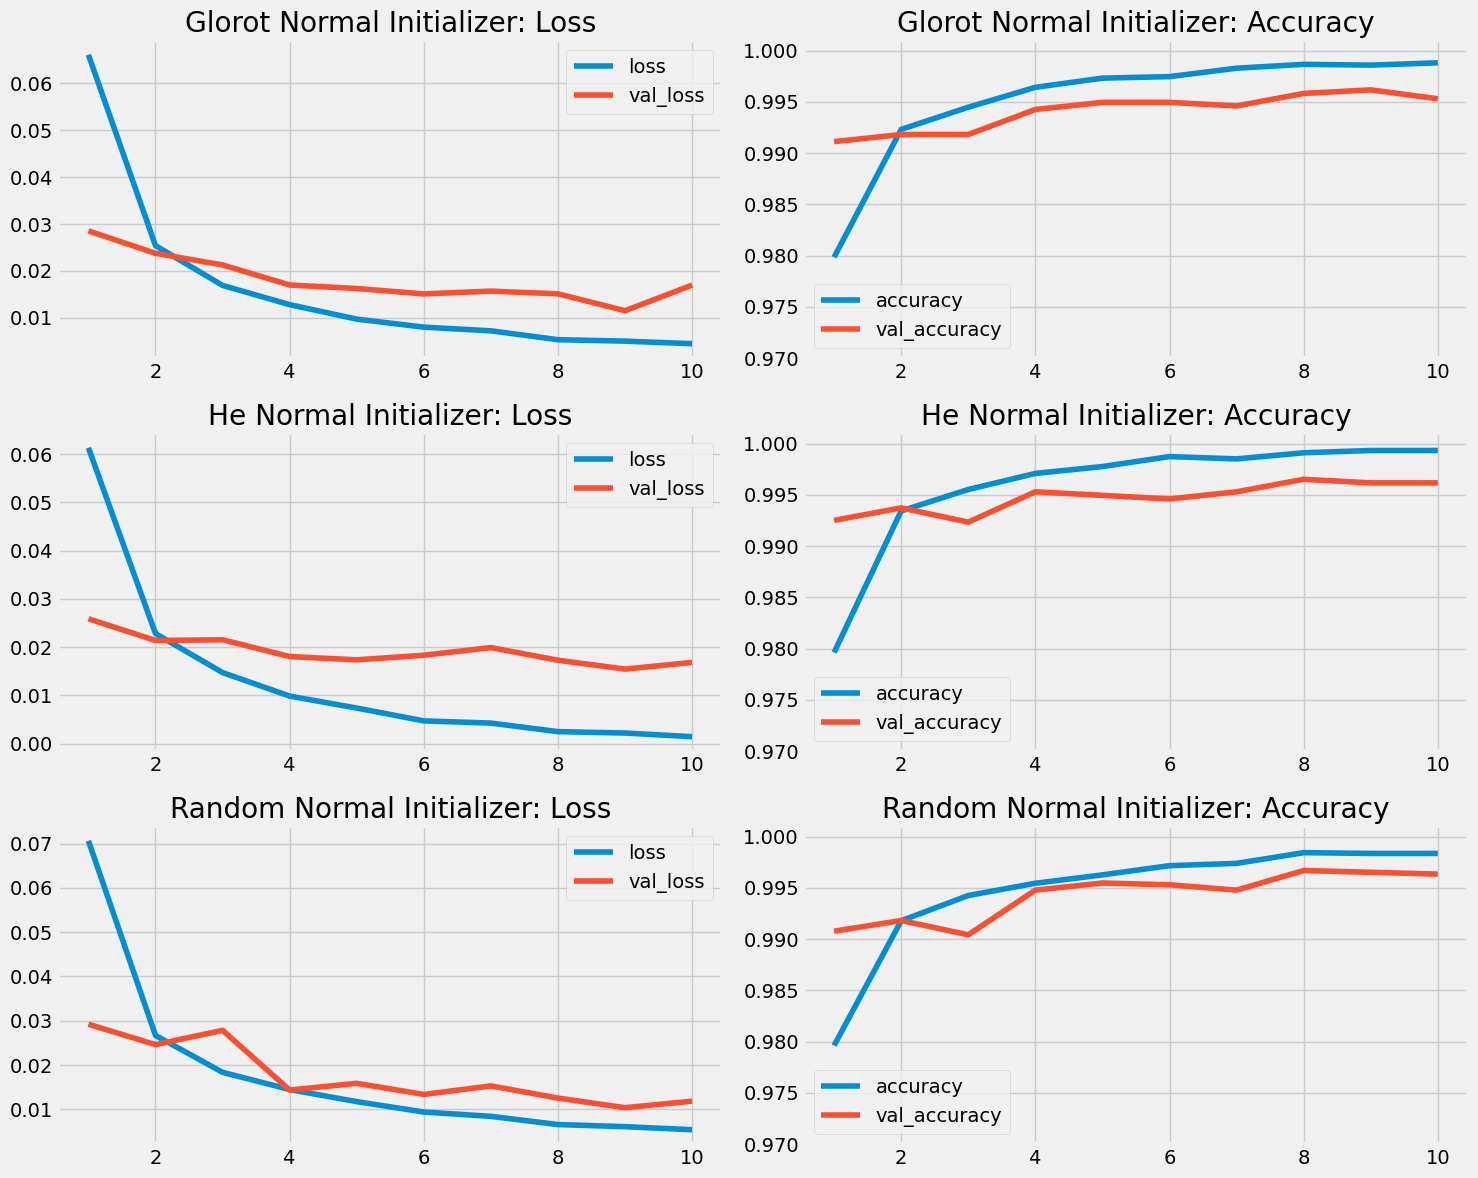

In [25]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))
y_lim = [0.97, 1.001]
glorot_normal_df[["loss", "val_loss"]].plot.line(title='Glorot Normal Initializer: Loss', ax=axes[0,0])
glorot_normal_df[["accuracy", "val_accuracy"]].plot.line(title='Glorot Normal Initializer: Accuracy', ax=axes[0,1], ylim=y_lim)

he_normal_df[["loss", "val_loss"]].plot.line(title='He Normal Initializer: Loss', ax=axes[1,0])
he_normal_df[["accuracy", "val_accuracy"]].plot.line(title='He Normal Initializer: Accuracy', ax=axes[1,1], ylim=y_lim)

random_normal_df[["loss", "val_loss"]].plot.line(title='Random Normal Initializer: Loss', ax=axes[2,0])
random_normal_df[["accuracy", "val_accuracy"]].plot.line(title='Random Normal Initializer: Accuracy', ax=axes[2,1], ylim=y_lim)

plt.tight_layout()
plt.show()

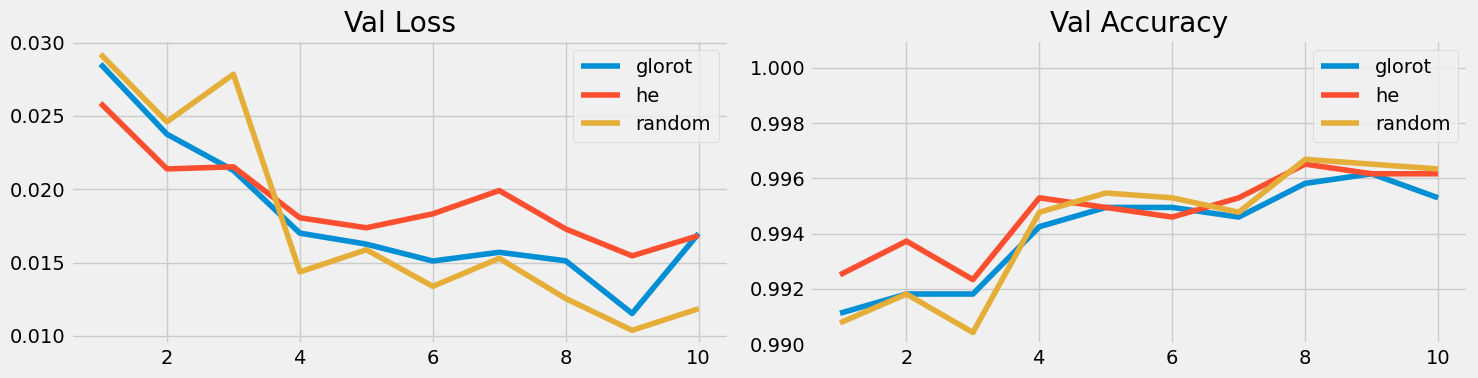

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))
y_lim = [0.99, 1.001]

initializer_val_loss = pd.DataFrame({
    'glorot':glorot_normal_df['val_loss'],
    'he':he_normal_df['val_loss'],
    'random':random_normal_df['val_loss']
})
initializer_val_loss.plot.line(title='Val Loss', ax=axes[0])

initializer_val_accuracy = pd.DataFrame({
    'glorot':glorot_normal_df['val_accuracy'],
    'he':he_normal_df['val_accuracy'],
    'random':random_normal_df['val_accuracy']
})
initializer_val_accuracy.plot.line(title='Val Accuracy', ax=axes[1], ylim=y_lim)

plt.legend()
plt.tight_layout()
plt.show()

The best initializer is Random Normal, due to the reason below:
1. Have the lowest possible validation loss compared to others, it reached 0.0104 in epoch 9. In epoch 9, also has the highest validation accuracy compared to others.
2. Have the highest possible validation accuracy, which was reached in epoch 8 0.9967.

# Activation Function

In [27]:
activation_func_history = {}

**ReLU Activation Function**

In [28]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
relu_model = lenet_network(weight_init=initializers.RandomNormal(), conv_act_func='relu')

relu_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

relu_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [30]:
activation_func_history['ReLU'] = relu_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 4s 8ms/step - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 2/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0246 - val_accuracy: 0.9918
Epoch 3/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 4/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0144 - val_accuracy: 0.9948
Epoch 5/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0159 - val_accuracy: 0.9955
Epoch 6/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0134 - val_accuracy: 0.9953
Epoch 7/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0153 - val_accuracy: 0.9948
Epoch 

**Sigmoid Activation Function**

In [31]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [32]:
sigmoid_model = lenet_network(weight_init=initializers.RandomNormal(), conv_act_func='sigmoid')

sigmoid_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

sigmoid_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [33]:
activation_func_history['Sigmoid'] = sigmoid_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 4s 8ms/step - loss: 1.1342 - accuracy: 0.3488 - val_loss: 1.0979 - val_accuracy: 0.3507
Epoch 2/10
419/419 [==============================] - 3s 8ms/step - loss: 1.0979 - accuracy: 0.3529 - val_loss: 1.0978 - val_accuracy: 0.3507
Epoch 3/10
419/419 [==============================] - 3s 8ms/step - loss: 1.0978 - accuracy: 0.3529 - val_loss: 1.0980 - val_accuracy: 0.3507
Epoch 4/10
419/419 [==============================] - 3s 8ms/step - loss: 1.0979 - accuracy: 0.3529 - val_loss: 1.0979 - val_accuracy: 0.3507
Epoch 5/10
419/419 [==============================] - 3s 8ms/step - loss: 1.0979 - accuracy: 0.3529 - val_loss: 1.0979 - val_accuracy: 0.3507
Epoch 6/10
419/419 [==============================] - 3s 8ms/step - loss: 1.0978 - accuracy: 0.3529 - val_loss: 1.0979 - val_accuracy: 0.3507
Epoch 7/10
419/419 [==============================] - 3s 8ms/step - loss: 1.0978 - accuracy: 0.3529 - val_loss: 1.0981 - val_accuracy: 0.3507
Epoch 

## Analysis

In [34]:
for model_name, model_history in activation_func_history.items():
    df_name = str(model_name.replace(' ', '_').lower()) + "_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1,11)))

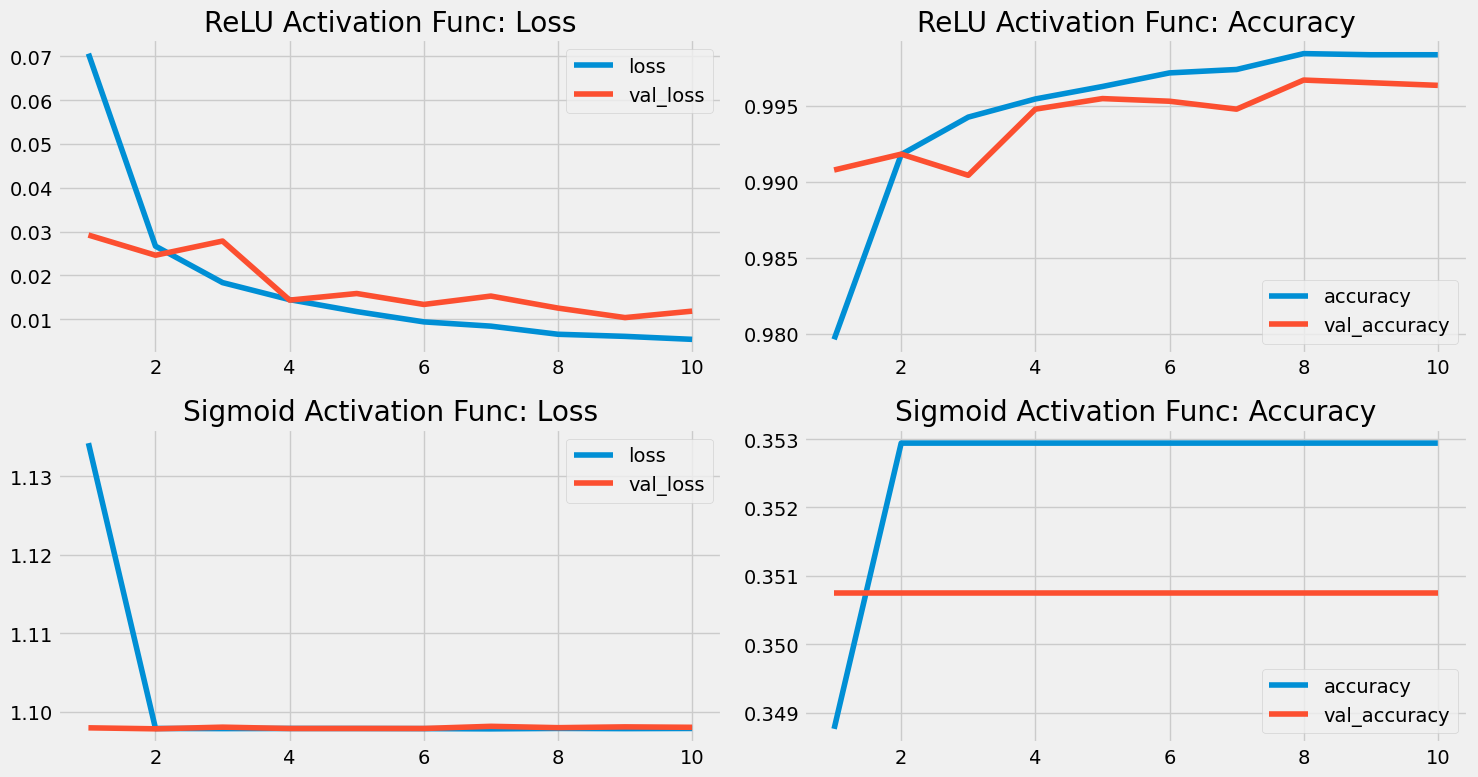

In [35]:
fig, axes = plt.subplots(2, 2, figsize = (15, 8))

relu_df[["loss", "val_loss"]].plot.line(title='ReLU Activation Func: Loss', ax=axes[0,0])
relu_df[["accuracy", "val_accuracy"]].plot.line(title='ReLU Activation Func: Accuracy', ax=axes[0,1])

sigmoid_df[["loss", "val_loss"]].plot.line(title='Sigmoid Activation Func: Loss', ax=axes[1,0])
sigmoid_df[["accuracy", "val_accuracy"]].plot.line(title='Sigmoid Activation Func: Accuracy', ax=axes[1,1])

plt.tight_layout()
plt.show()

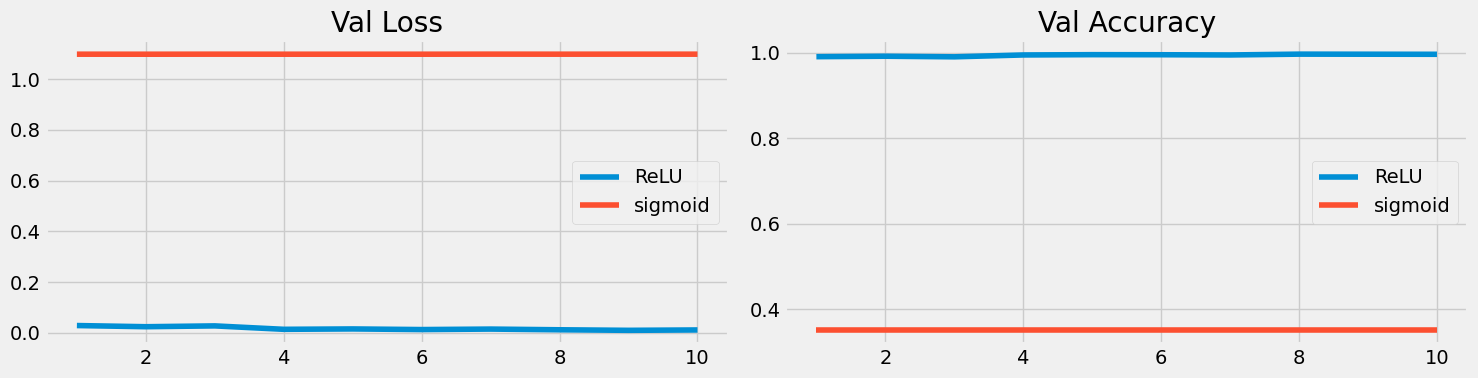

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

activation_func_val_loss = pd.DataFrame({
    'ReLU':relu_df['val_loss'],
    'sigmoid':sigmoid_df['val_loss'],
})
activation_func_val_loss.plot.line(title='Val Loss', ax=axes[0])

activation_func_val_accuracy = pd.DataFrame({
    'ReLU':relu_df['val_accuracy'],
    'sigmoid':sigmoid_df['val_accuracy'],
})
activation_func_val_accuracy.plot.line(title='Val Accuracy', ax=axes[1])

plt.legend()
plt.tight_layout()
plt.show()

The best activation function is ReLU, due to the reason below:
1. The differences in loss (both on training and validation) are really big.
2. The differences in accuracy (both on training and validation) are also really big.
3. Sigmoid doesn't work in the random-normal initialized convolutional layer.

About ReLU:
- RelU function is a piecewise linear function that outputs the input directly if is positive i.e. > 0, otherwise, it will output zero.
- ReLU layer will apply an elementwise activation function, such as the max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([26x26x32]).
- ReLU activation function as a layer, applies elementwise non-linearity.
- ReLU prevents the emergence of the so-called "vanishing gradient" problem, which is common when using sigmoidal functions.

About Sigmoid:
- This activation function is here only for historical reasons and never used in real models. It is computationally expensive, causes vanishing gradient problem and not zero-centred. This method is generally used for binary classification problems.

Why Sigmoid doesn't work with convolutional layer:
- If we use the sigmoid activation function (that has possible value: 0-1) in the convolutional layer, we let the gradient (derivaties of activation function) be smaller on each iteration since we limit them to a maximum of 1, thus as the iteration keeps increasing, the gradient will vanish which is called as vanishing gradient problem.

Source:
- https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253
- https://www.baeldung.com/cs/ml-relu-dropout-layers
- https://towardsdatascience.com/convolution-neural-networks-a-beginners-guide-implementing-a-mnist-hand-written-digit-8aa60330d022
- https://cs231n.github.io/convolutional-networks/

# Optimizer

In [37]:
optimizer_history = {}

**SGD nestervov**

In [38]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
sgd_nesterov_model = lenet_network(weight_init=initializers.RandomNormal(), conv_act_func='relu')

sgd_nesterov_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = optimizers.SGD(
        nesterov=True, name='SGD'
    )
)

sgd_nesterov_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [40]:
optimizer_history['SGD nesterov'] = sgd_nesterov_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 3s 7ms/step - loss: 0.2727 - accuracy: 0.9369 - val_loss: 0.0926 - val_accuracy: 0.9714
Epoch 2/10
419/419 [==============================] - 3s 6ms/step - loss: 0.0778 - accuracy: 0.9756 - val_loss: 0.0718 - val_accuracy: 0.9768
Epoch 3/10
419/419 [==============================] - 3s 6ms/step - loss: 0.0645 - accuracy: 0.9795 - val_loss: 0.0670 - val_accuracy: 0.9779
Epoch 4/10
419/419 [==============================] - 3s 6ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0574 - val_accuracy: 0.9821
Epoch 5/10
419/419 [==============================] - 3s 6ms/step - loss: 0.0522 - accuracy: 0.9840 - val_loss: 0.0538 - val_accuracy: 0.9836
Epoch 6/10
419/419 [==============================] - 3s 6ms/step - loss: 0.0485 - accuracy: 0.9850 - val_loss: 0.0508 - val_accuracy: 0.9842
Epoch 7/10
419/419 [==============================] - 3s 6ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 

**Adam**

In [41]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
adam_model = lenet_network(weight_init=initializers.RandomNormal(), conv_act_func='relu')

adam_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = optimizers.Adam(
        name='Adam'
    )
)

adam_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [43]:
optimizer_history['Adam'] = adam_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 4s 8ms/step - loss: 0.0799 - accuracy: 0.9786 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 2/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0285 - val_accuracy: 0.9894
Epoch 3/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0176 - val_accuracy: 0.9930
Epoch 4/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0102 - accuracy: 0.9966 - val_loss: 0.0179 - val_accuracy: 0.9943
Epoch 5/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 0.0154 - val_accuracy: 0.9956
Epoch 6/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0263 - val_accuracy: 0.9915
Epoch 7/10
419/419 [==============================] - 3s 7ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0143 - val_accuracy: 0.9960
Epoch 

**RMSprop**

In [44]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
rmsprop_model = lenet_network(weight_init=initializers.RandomNormal(), conv_act_func='relu')

rmsprop_model.compile(
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"],
    optimizer = optimizers.RMSprop(
        name='RMSprop'
    )
)

rmsprop_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                346176    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 346,691
Trainable params: 346,691
Non-trainable params: 0
_________________________________________________________________


In [46]:
optimizer_history['RMSprop'] = rmsprop_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 10).history

Epoch 1/10
419/419 [==============================] - 5s 9ms/step - loss: 0.0706 - accuracy: 0.9796 - val_loss: 0.0292 - val_accuracy: 0.9908
Epoch 2/10
419/419 [==============================] - 4s 9ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.0246 - val_accuracy: 0.9918
Epoch 3/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0278 - val_accuracy: 0.9904
Epoch 4/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0145 - accuracy: 0.9954 - val_loss: 0.0144 - val_accuracy: 0.9948
Epoch 5/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0159 - val_accuracy: 0.9955
Epoch 6/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0134 - val_accuracy: 0.9953
Epoch 7/10
419/419 [==============================] - 3s 8ms/step - loss: 0.0084 - accuracy: 0.9974 - val_loss: 0.0153 - val_accuracy: 0.9948
Epoch 

## Analysis

In [47]:
for model_name, model_history in optimizer_history.items():
    df_name = str(model_name.replace(' ', '_').lower()) + "_df"
    locals()[df_name] = pd.DataFrame(model_history, index = (range(1,11)))

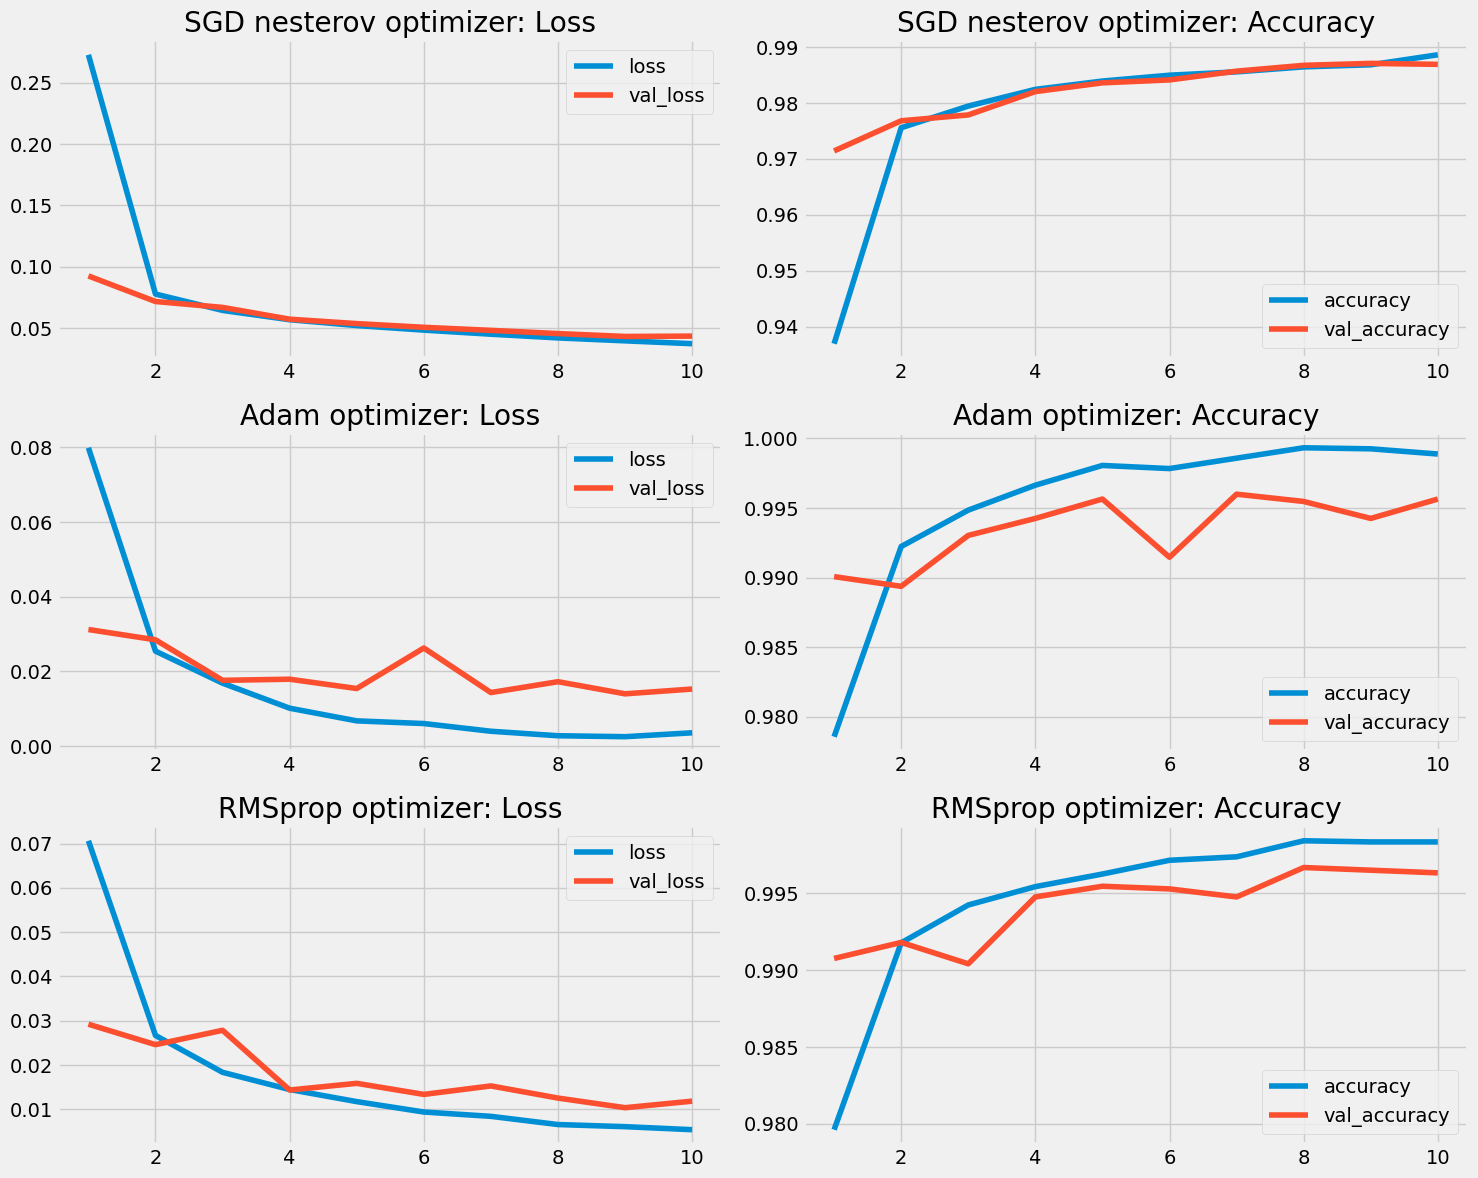

In [48]:
fig, axes = plt.subplots(3, 2, figsize = (15, 12))

sgd_nesterov_df[["loss", "val_loss"]].plot.line(title='SGD nesterov optimizer: Loss', ax=axes[0,0])
sgd_nesterov_df[["accuracy", "val_accuracy"]].plot.line(title='SGD nesterov optimizer: Accuracy', ax=axes[0,1])

adam_df[["loss", "val_loss"]].plot.line(title='Adam optimizer: Loss', ax=axes[1,0])
adam_df[["accuracy", "val_accuracy"]].plot.line(title='Adam optimizer: Accuracy', ax=axes[1,1])

rmsprop_df[["loss", "val_loss"]].plot.line(title='RMSprop optimizer: Loss', ax=axes[2,0])
rmsprop_df[["accuracy", "val_accuracy"]].plot.line(title='RMSprop optimizer: Accuracy', ax=axes[2,1])

plt.tight_layout()
plt.show()

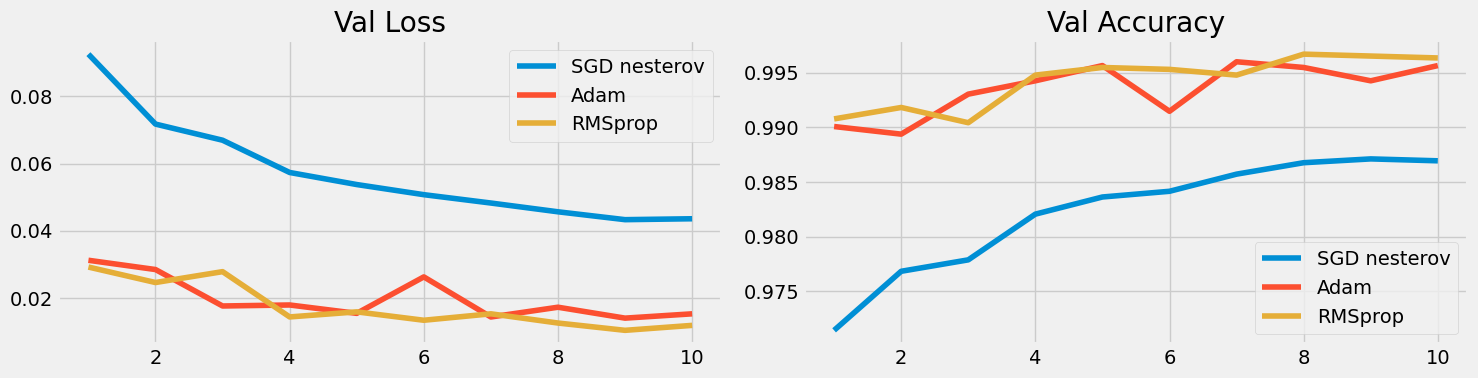

In [51]:
fig, axes = plt.subplots(1, 2, figsize = (15, 4))

optimizer_val_loss = pd.DataFrame({
    'SGD nesterov':sgd_nesterov_df['val_loss'],
    'Adam':adam_df['val_loss'],
    'RMSprop':rmsprop_df['val_loss'],
})
optimizer_val_loss.plot.line(title='Val Loss', ax=axes[0])

optimizer_val_accuracy = pd.DataFrame({
    'SGD nesterov':sgd_nesterov_df['val_accuracy'],
    'Adam':adam_df['val_accuracy'],
    'RMSprop':rmsprop_df['val_accuracy'],
})
optimizer_val_accuracy.plot.line(title='Val Accuracy', ax=axes[1])

plt.legend()
plt.tight_layout()
plt.show()

The best optimizer is RMSProp, due to the reason below:
1. Have the lowest possible validation loss compared to others, it reached 0.01 in epoch 9.
2. Have the highest possible validation accuracy, which was reached in epoch 8 >0.995. On all optimizers, the accuracy score is really good, all of them achieved 99%. But, there's s slightly smaller difference between training and validation accuracy of RMSprop compared to SGD and Adam.

## Hyperparameter Tuning: Optimizers

https://www.tensorflow.org/tutorials/keras/keras_tuner

**SGD nestervov**

default learning_rate = 1e-02

In [55]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
def lenet_network_sgd_tuning(hp):
    
    model = Sequential([
        Conv2D(32, [3, 3], activation='relu', kernel_initializer=initializers.RandomNormal(), input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size = (2, 2)),
        Flatten(),
        Dense(units=64, activation='relu', kernel_initializer=initializers.RandomNormal()),
        Dense(3, activation='softmax')
    ])
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
    optimizer = optimizers.SGD(
        nesterov=True, learning_rate=hp_learning_rate, name='SGD'
    )
    model.compile(
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"],
        optimizer = optimizer
    )
    
    return model

In [57]:
tuner_sgd = kt.Hyperband(
    lenet_network_sgd_tuning, objective='val_accuracy', directory='my_dir', project_name='sgd', max_epochs=10
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [58]:
tuner_sgd.search(X_train, y_train, validation_data = (X_val, y_val), epochs=20, callbacks=[stop_early])

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.38679903745651245

Best val_accuracy So Far: 0.9876349568367004
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit


In [59]:
# Get the optimal hyperparameters
best_hps_sgd=tuner_sgd.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for SGD optimizer is {best_hps_sgd.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal learning rate for SGD optimizer is 0.1.



**ADAM**

default learning_rate = 1e-03

In [60]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
def lenet_network_adam_tuning(hp):
    
    model = Sequential([
        Conv2D(32, [3, 3], activation='relu', kernel_initializer=initializers.RandomNormal(), input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size = (2, 2)),
        Flatten(),
        Dense(units=64, activation='relu', kernel_initializer=initializers.RandomNormal()),
        Dense(3, activation='softmax')
    ])
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
    optimizer = optimizers.Adam(
        learning_rate=hp_learning_rate, name='Adam'
    )
    model.compile(
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"],
        optimizer = optimizer
    )
    
    return model

In [62]:
tuner_adam = kt.Hyperband(
    lenet_network_adam_tuning, objective='val_accuracy', directory='my_dir', project_name='adam', max_epochs=10
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [63]:
tuner_adam.search(X_train, y_train, validation_data = (X_val, y_val), epochs=20, callbacks=[stop_early])

Trial 5 Complete [00h 00m 07s]
val_accuracy: 0.9622082710266113

Best val_accuracy So Far: 0.9928596019744873
Total elapsed time: 00h 00m 40s
INFO:tensorflow:Oracle triggered exit


In [64]:
# Get the optimal hyperparameters
best_hps_adam=tuner_adam.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for Adam optimizer is {best_hps_adam.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal learning rate for Adam optimizer is 0.01.



**RMSProp**

default learning_rate=1e-03

In [65]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
def lenet_network_rmsprop_tuning(hp):
    
    model = Sequential([
        Conv2D(32, [3, 3], activation='relu', kernel_initializer=initializers.RandomNormal(), input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size = (2, 2)),
        Flatten(),
        Dense(units=64, activation='relu', kernel_initializer=initializers.RandomNormal()),
        Dense(3, activation='softmax')
    ])
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
    optimizer = optimizers.RMSprop(
        learning_rate=hp_learning_rate, name='RMSprop'
    )
    model.compile(
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"],
        optimizer = optimizer
    )
    
    return model

In [67]:
tuner_rmsprop = kt.Hyperband(
    lenet_network_rmsprop_tuning, objective='val_accuracy', directory='my_dir', project_name='rmsprop', max_epochs=10
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [68]:
tuner_rmsprop.search(X_train, y_train, validation_data = (X_val, y_val), epochs=20, callbacks=[stop_early])

Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.9905956387519836

Best val_accuracy So Far: 0.9937304258346558
Total elapsed time: 00h 00m 43s
INFO:tensorflow:Oracle triggered exit


In [69]:
# Get the optimal hyperparameters
best_hps_rmsprop=tuner_rmsprop.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for RMSprop optimizer is {best_hps_rmsprop.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal learning rate for RMSprop optimizer is 0.01.



## Conclusion

The best optimizer is RMSprop with learning rate 1e-02.

# Full Train

Now that we have choose our weight initializer, activation function, and optimizer, let's initiate a new network and fully train it in long epochs to achieve most optimal result.

In [70]:
np.random.seed(42)
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [71]:
final_model = tuner_rmsprop.hypermodel.build(best_hps_rmsprop)

In [72]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

In [73]:
final_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, callbacks=[stop_early])

Epoch 1/100
419/419 [==============================] - 4s 8ms/step - loss: 0.1084 - accuracy: 0.9775 - val_loss: 0.0316 - val_accuracy: 0.9901
Epoch 2/100
419/419 [==============================] - 3s 7ms/step - loss: 0.0271 - accuracy: 0.9941 - val_loss: 0.0287 - val_accuracy: 0.9922
Epoch 3/100
419/419 [==============================] - 3s 7ms/step - loss: 0.0206 - accuracy: 0.9950 - val_loss: 0.0296 - val_accuracy: 0.9920
Epoch 4/100
419/419 [==============================] - 3s 8ms/step - loss: 0.0200 - accuracy: 0.9954 - val_loss: 0.0240 - val_accuracy: 0.9932
Epoch 5/100
419/419 [==============================] - 3s 7ms/step - loss: 0.0146 - accuracy: 0.9967 - val_loss: 0.0242 - val_accuracy: 0.9943
Epoch 6/100
419/419 [==============================] - 3s 7ms/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 0.0280 - val_accuracy: 0.9932
Epoch 7/100
419/419 [==============================] - 3s 7ms/step - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.0262 - val_accuracy: 0.9948

In [74]:
final_model_history = pd.DataFrame(final_model.history.history, index = (range(1,25)))

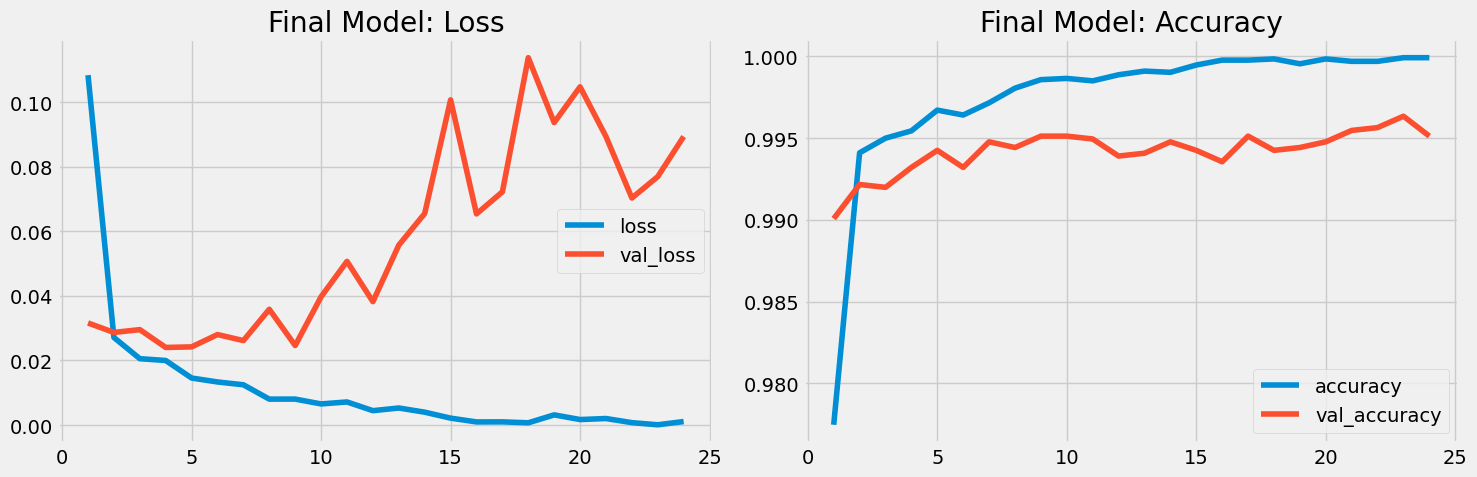

In [75]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5))
final_model_history[["loss", "val_loss"]].plot.line(title='Final Model: Loss', ax=axes[0])
final_model_history[["accuracy", "val_accuracy"]].plot.line(title='Final Model: Accuracy', ax=axes[1])

plt.tight_layout()
plt.show()

## X_test

In [76]:
y_proba = final_model.predict(X_test)
y_pred = np.argmax(y_proba, axis=-1)

In [77]:
confusion_matrix(y_test, y_pred)

array([[1134,    1,    0],
       [   0, 1007,    3],
       [   1,    3, 1024]], dtype=int64)

In [78]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.999     0.999     0.999      1135
         1.0      0.996     0.997     0.997      1010
         2.0      0.997     0.996     0.997      1028

    accuracy                          0.997      3173
   macro avg      0.997     0.997     0.997      3173
weighted avg      0.997     0.997     0.997      3173



In [79]:
class_0 = np.where(y_test == 0.0, 1.0, 0.0)
class_1 = np.where(y_test == 1.0, 1.0, 0.0)
class_2 = np.where(y_test == 2.0, 1.0, 0.0)

pred_class_0 = np.where(y_pred == 0.0, 1.0, 0.0)
pred_class_1 = np.where(y_pred == 1.0, 1.0, 0.0)
pred_class_2 = np.where(y_pred == 2.0, 1.0, 0.0)

**ROC AUC score (One vs Rest)**

In [80]:
print(f"Class 0 (Image of 1): {round(roc_auc_score(class_0, pred_class_0), 4)}")
print(f"Class 1 (Image of 3): {round(roc_auc_score(class_1, pred_class_1), 4)}")
print(f"Class 2 (Image of 7): {round(roc_auc_score(class_2, pred_class_2), 4)}")

Class 0 (Image of 1): 0.9993
Class 1 (Image of 3): 0.9976
Class 2 (Image of 7): 0.9974


# Loss Curve Analysis

**Effect of using different activation functions on the learning curve.**

By comparing ReLU and sigmoid, we get a really different model performance. If we use the sigmoid activation function (that has possible value: 0-1) in the convolutional layer, we let the gradient (derivatives of activation function) be smaller on each iteration since we limit them to a maximum of 1, thus as the iteration keeps increasing, the gradient will vanish which is called as vanishing gradient problem.

While if we use ReLU, the gradient will not vanish because it has the value max(0,x) which doesn't have an upper limit so the gradient will not vanish because it has enough value (the result of activation function calculation from the previous nodes as the input of the next nodes) that needed to improve the model performance.

In this experiment, the vanishing gradient can be seen by the loss of the sigmoid model that stuck in 1.0 doesn't improve from epoch 2 until the training has finished.

**Effect of using different optimizers on learning curve.**

Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function. Since Adam and RMSprop have an adaptive learning rate, it helps point the resulting updates more directly toward the global optimum which is not the same with SGD that doesn't have adaptive learning rate.

The loss function of SGD is also started in bigger value compared to Adam and RMSprop. In the first epoch, Adam and RMSprop have loss below 0.1 but SGD have loss 0.25 which means the convergence speed. As the epoch increasing, both of Adam and RMSprop achieve converge faster in epoch 6 (loss below 0.01) while the SGD in epoch 6 still have loss ~0.05. This means that Adam and RMSprop converge faster than SGD.

This means that we will get better result faster if we use the optimizer with adaptive learning rate.

**Effect of hyperparameter tuning on the optimizers.**

We have experiment the hyperparameter tuning of learning rate on each optimizer. From the experiment, the model reach its best score in:
- SGD with learning rate 1e-01 (val accuracy=0.9876349568367004),
- Adam with learning rate 1e-02 (val accuracy=0.9926854968070984),
- RMSprop with its default learning rate 1e-02 (val accuracy=0.9932079315185547).

By comparing the validation accuracy of three models, we have the best score in RMSprop optimizer model with learning rate 1e-02 which achieve score of 99.32%. This means, amongst the 3 optimizers, RMSprop is the most suitable optimizer for the MNIST problems (class 1, 3, and 7) which also achieve its best score without changing the default learning rate.

**Which are the most optimal settings for training a network for MNIST problems, and assess why it produces the best result.**

- The most optimal settings:
kernel initializer = Random Normal, activation function for convolutional layer = ReLU, optimizer = RMSprop with learning rate 1e-02.

Why it produces the best result:
- ReLU activation function on the convolutional layer lets the training process keep going as it doesn't cause a vanishing gradient problem.
- The RMSprop optimizer has an adaptive learning rate which can accelerate training and alleviate some of the pressure of choosing a learning rate and learning rate schedule.